<a href="https://colab.research.google.com/github/ayanokoji024/vigilant-adventure/blob/main/shortest_path_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

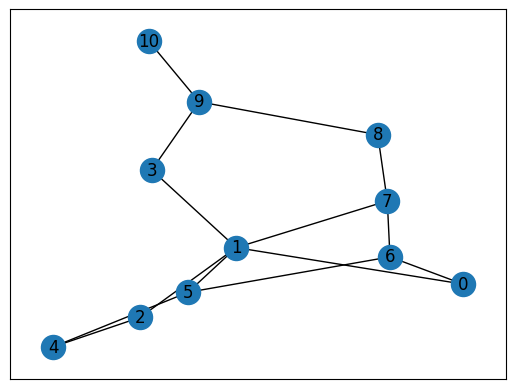

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import random

edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),
(1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
(8, 9), (7, 8), (1, 7), (3, 9)]

#Step 2: Defining and visualizing the graph

goal = 10

G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

In [ ]:
R = np.matrix(np.zeros(shape=(11, 11)))
for x in G[10]:
  R[x,10] = 100

Q = np.matrix(np.zeros(shape=(11, 11)))
Q-=100

for node in G.nodes:
  for x in G[node]:
    Q[node, x]=0
    Q[x, node]=0

In [ ]:
pd.DataFrame(R)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


In [ ]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0
1,0.0,-100.0,0.0,0.0,-100.0,0.0,-100.0,0.0,-100.0,-100.0,-100.0
2,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0
4,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,0.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0
6,0.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0,-100.0,-100.0
7,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0,-100.0
8,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0
9,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0


In [ ]:
def next_number(start,er):
  random_value=random.uniform(0, 1)
  if random_value < er:
    sample = G[start]
  else:
    sample=np.where(Q[start, ] == np.max(Q[start,]))[1]
  next_node = int(np.random.choice(sample,1))
  return next_node

In [ ]:
def updateQ(node1,node2,lr,discount):

  max_index = np.where(Q[node2,]==np.max(Q[node2,]))[1]
  if max_index.shape[0] > 1:
    max_index=int(np.random.choice(max_index,size=1))
  else:
    max_index=int(max_index)
  max_value=Q[node2,max_index]
  Q[node1, node2] = int(1-lr)*Q[node1,node2]+lr*(R[node1, node2] + discount*max_value)

In [ ]:
def learn(er, lr, discount):
  for i in range(50000):
    start=np.random.randint(0,11)
    next_node=next_number(start,er)
    updateQ(start,next_node,lr,discount)


In [ ]:
learn(0.5,0.8,0.8)

In [ ]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.000000,35.520867,-100.000000,-100.000000,-100.000000,-100.000000,22.733355,-100.000000,-100.000000,-100.000000,-100.000000
1,22.733355,-100.000000,22.733355,55.501355,-100.000000,22.733355,-100.000000,35.520867,-100.000000,-100.000000,-100.000000
2,-100.000000,35.520867,-100.000000,-100.000000,14.549347,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
3,-100.000000,35.520867,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,86.720867,-100.000000
4,-100.000000,-100.000000,22.733355,-100.000000,-100.000000,22.733355,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
5,-100.000000,35.520867,-100.000000,-100.000000,14.549347,-100.000000,22.733355,-100.000000,-100.000000,-100.000000,-100.000000
6,22.733355,-100.000000,-100.000000,-100.000000,-100.000000,22.733355,-100.000000,35.520867,-100.000000,-100.000000,-100.000000
7,-100.000000,35.520867,-100.000000,-100.000000,-100.000000,-100.000000,22.733355,-100.000000,55.501355,-100.000000,-100.000000
8,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,35.520867,-100.000000,86.720867,-100.000000
9,-100.000000,-100.000000,-100.000000,55.501355,-100.000000,-100.000000,-100.000000,-100.000000,55.501355,-100.000000,135.501355


In [ ]:
def shortest_path(begin,end):
  path=[begin]
  next_node=np.argmax(Q[begin,])
  path.append(next_node)
  while next_node != end:
    next_node=np.argmax(Q[next_node,])
    path.append(next_node)
  return path

In [ ]:
shortest_path(0,10)

[0, 1, 3, 9, 10]